In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join
import matplotlib.pyplot as plt
import hsluv

sns.set_style('whitegrid')

<Figure size 432x288 with 0 Axes>

In [25]:
data_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/data'
fig_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/figures'

In [26]:
df = pd.read_csv(join(data_dir, 'iq+brain+demo.csv'), index_col=0, header=0)
df_ladies = df[df['Sex'] == 'F']
df_ladies = df_ladies.drop('Sex', axis=1)
df_dudes = df[df['Sex'] == 'M']
df_dudes = df_dudes.drop('Sex', axis=1)

In [27]:
labels = ['Limbic', 'Orbitofrontal', 'Basal Ganglia', 'Salience', 'Hunger', 
          'Motor Learning', 'Frontoparietal', 'Hand', 'Motor Execution', 'Higher Order Visual', 
          'Lateral Visual', 'Medial Visual', 'Default Mode',' Cerebellum', 'Central Executive (left)', 
          'Auditory', 'Mouth', 'Central Executive (right)']

In [28]:
brain_data = df[['fc default mode-left central executive gen',
                             'fc default mode-left central executive phy',
                             'fc default mode-right central executive gen',
                             'fc default mode-right central executive phy',
                             'fc left central executive-right central executive gen',
                             'fc left central executive-right central executive phy',
                             'fc hippo-left central executive gen',
                             'fc hippo-left central executive phy',
                             'fc hippo-right central executive gen',
                             'fc hippo-right central executive phy',
                             'fc hippo-default mode gen', 'fc hippo-default mode phy',
                             'global efficiency gen', 'global efficiency phy', 
                             'le default mode gen', 'le default mode phy', 
                             'le left central executive gen', 'le left central executive phy', 
                             'le right central executive gen', 'le right central executive phy']].values

In [29]:
multicol1 = pd.MultiIndex.from_tuples([('dmn-lcen', 'gen'),
                                       ('dmn-lcen', 'phy'),
                                       ('dmn-rcen', 'gen'),
                                       ('dmn-rcen', 'phy'),
                                       ('rcen-lcen', 'gen'),
                                       ('rcen-lcen', 'phy'),
                                       ('hippo-lcen', 'gen'),
                                       ('hippo-lcen', 'phy'),
                                       ('hippo-rcen', 'gen'),
                                       ('hippo-rcen', 'phy'),
                                       ('hippo-dmn', 'gen'),
                                       ('hippo-dmn', 'phy'),
                                       ('global-eff', 'gen'),
                                       ('global-eff', 'phy'),
                                       ('le-dmn', 'gen'),
                                       ('le-dmn', 'phy'),
                                       ('le-lcen', 'gen'),
                                       ('le-lcen', 'phy'),
                                       ('le-rcen', 'gen'),
                                       ('le-rcen', 'phy')])

brain_df = pd.DataFrame(brain_data, index=df.index, columns=multicol1)

In [8]:
#brain_df.stack().to_csv(join(data_dir, 'brain_df_long.csv'))

In [31]:
brain_df = pd.read_csv(join(data_dir, 'brain_df_long.csv'), header=0, index_col=0)
brain_df.keys()

Index(['Sex', 'condition', 'dmn-lcen', 'dmn-rcen', 'global-eff', 'hippo-dmn',
       'hippo-lcen', 'hippo-rcen', 'le-dmn', 'le-lcen', 'le-rcen',
       'rcen-lcen'],
      dtype='object')

In [4]:
hustle = sns.husl_palette(8)
hustler = sns.husl_palette(8, h=.8)

In [6]:
hustle[0:2]

[[0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.8087954113106306, 0.5634700050056693, 0.19502642696727285]]

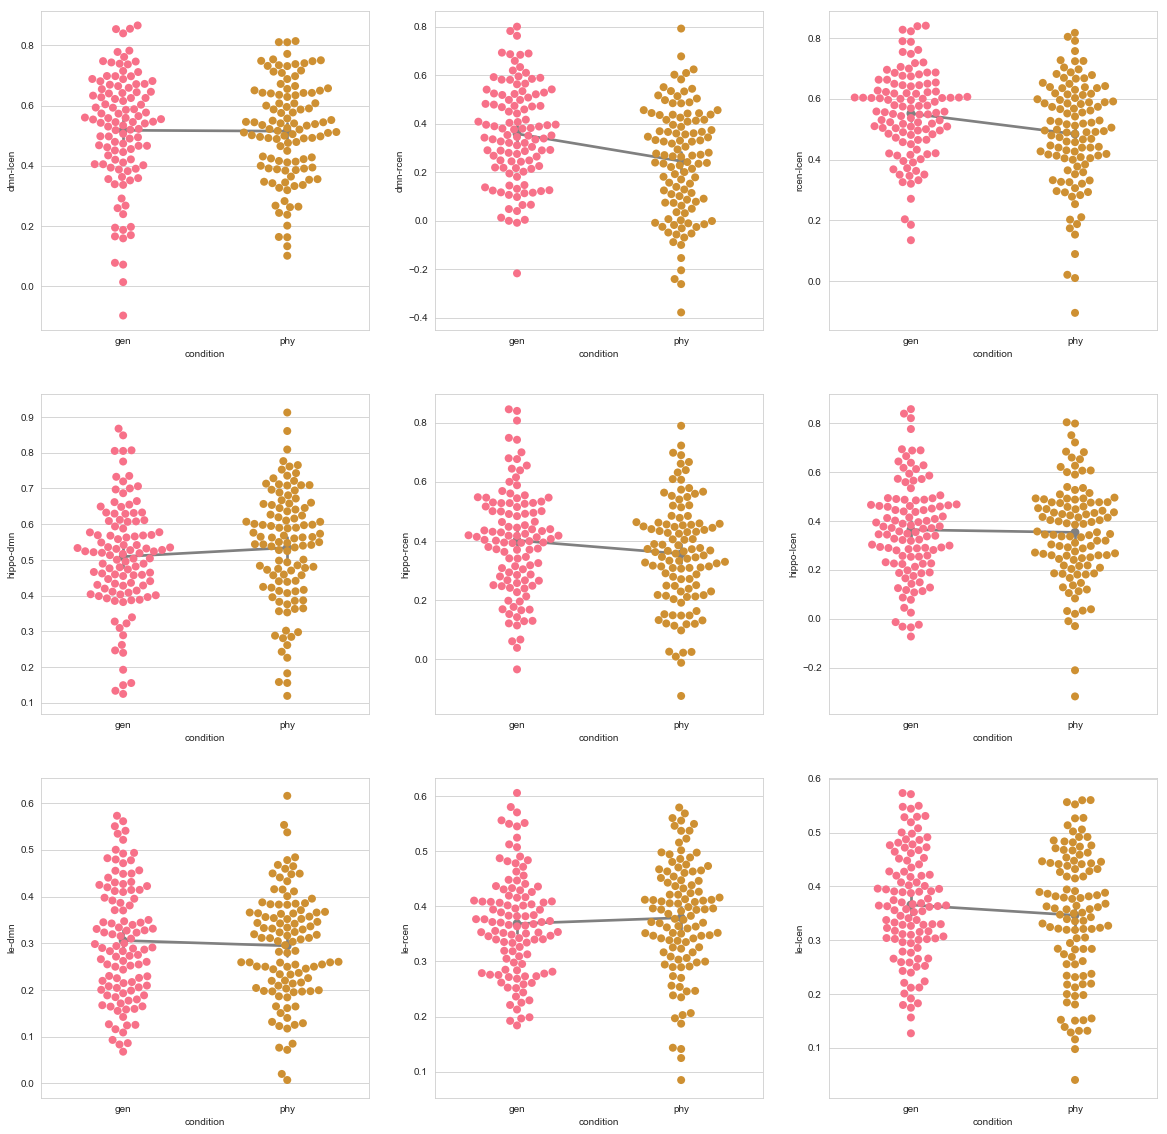

In [12]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), sharex=False, sharey=False, squeeze=True)
mksz = 8

sns.set_palette(hustle)

sns.pointplot(x="condition", y="dmn-lcen", data=brain_df, ax=ax[0][0], size=mksz, color='gray')
sns.pointplot(x="condition", y="dmn-rcen", data=brain_df, ax=ax[0][1], size=mksz, color='gray')
sns.pointplot(x="condition", y="rcen-lcen", data=brain_df, ax=ax[0][2], size=mksz, color='gray')
sns.pointplot(x="condition", y="hippo-dmn", data=brain_df, ax=ax[1][0], size=mksz, color='gray')
sns.pointplot(x="condition", y="hippo-rcen", data=brain_df, ax=ax[1][1], size=mksz, color='gray')
sns.pointplot(x="condition", y="hippo-lcen", data=brain_df, ax=ax[1][2], size=mksz, color='gray')
sns.pointplot(x="condition", y="le-dmn", data=brain_df, ax=ax[2][0], size=mksz, color='gray')
sns.pointplot(x="condition", y="le-rcen", data=brain_df, ax=ax[2][1], size=mksz, color='gray')
sns.pointplot(x="condition", y="le-lcen", data=brain_df, ax=ax[2][2], size=mksz, color='gray')

sns.swarmplot(x="condition", y="dmn-lcen", data=brain_df, ax=ax[0][0], size=mksz)
sns.swarmplot(x="condition", y="dmn-rcen", data=brain_df, ax=ax[0][1], size=mksz)
#ax[0][0].set_ylim(-1,1)
sns.swarmplot(x="condition", y="rcen-lcen", data=brain_df, ax=ax[0][2], size=mksz)
sns.swarmplot(x="condition", y="hippo-dmn", data=brain_df, ax=ax[1][0], size=mksz)
sns.swarmplot(x="condition", y="hippo-rcen", data=brain_df, ax=ax[1][1], size=mksz)
sns.swarmplot(x="condition", y="hippo-lcen", data=brain_df, ax=ax[1][2], size=mksz)
sns.swarmplot(x="condition", y="le-dmn", data=brain_df, ax=ax[2][0], size=mksz)
sns.swarmplot(x="condition", y="le-rcen", data=brain_df, ax=ax[2][1], size=mksz)
sns.swarmplot(x="condition", y="le-lcen", data=brain_df, ax=ax[2][2], size=mksz)

#fig.savefig(join(fig_dir, '1-brain_networks_condition_swarm.png'), dpi=300)

In [32]:
brain_df.keys()

Index(['Sex', 'condition', 'dmn-lcen', 'dmn-rcen', 'global-eff', 'hippo-dmn',
       'hippo-lcen', 'hippo-rcen', 'le-dmn', 'le-lcen', 'le-rcen',
       'rcen-lcen'],
      dtype='object')

In [33]:
gen_brain_df = brain_df[brain_df['condition'] == 'gen']
phy_brain_df = brain_df[brain_df['condition'] == 'phy']

In [34]:
m_brain_df = brain_df[brain_df['Sex'] == 'M']
f_brain_df = brain_df[brain_df['Sex'] == 'F']

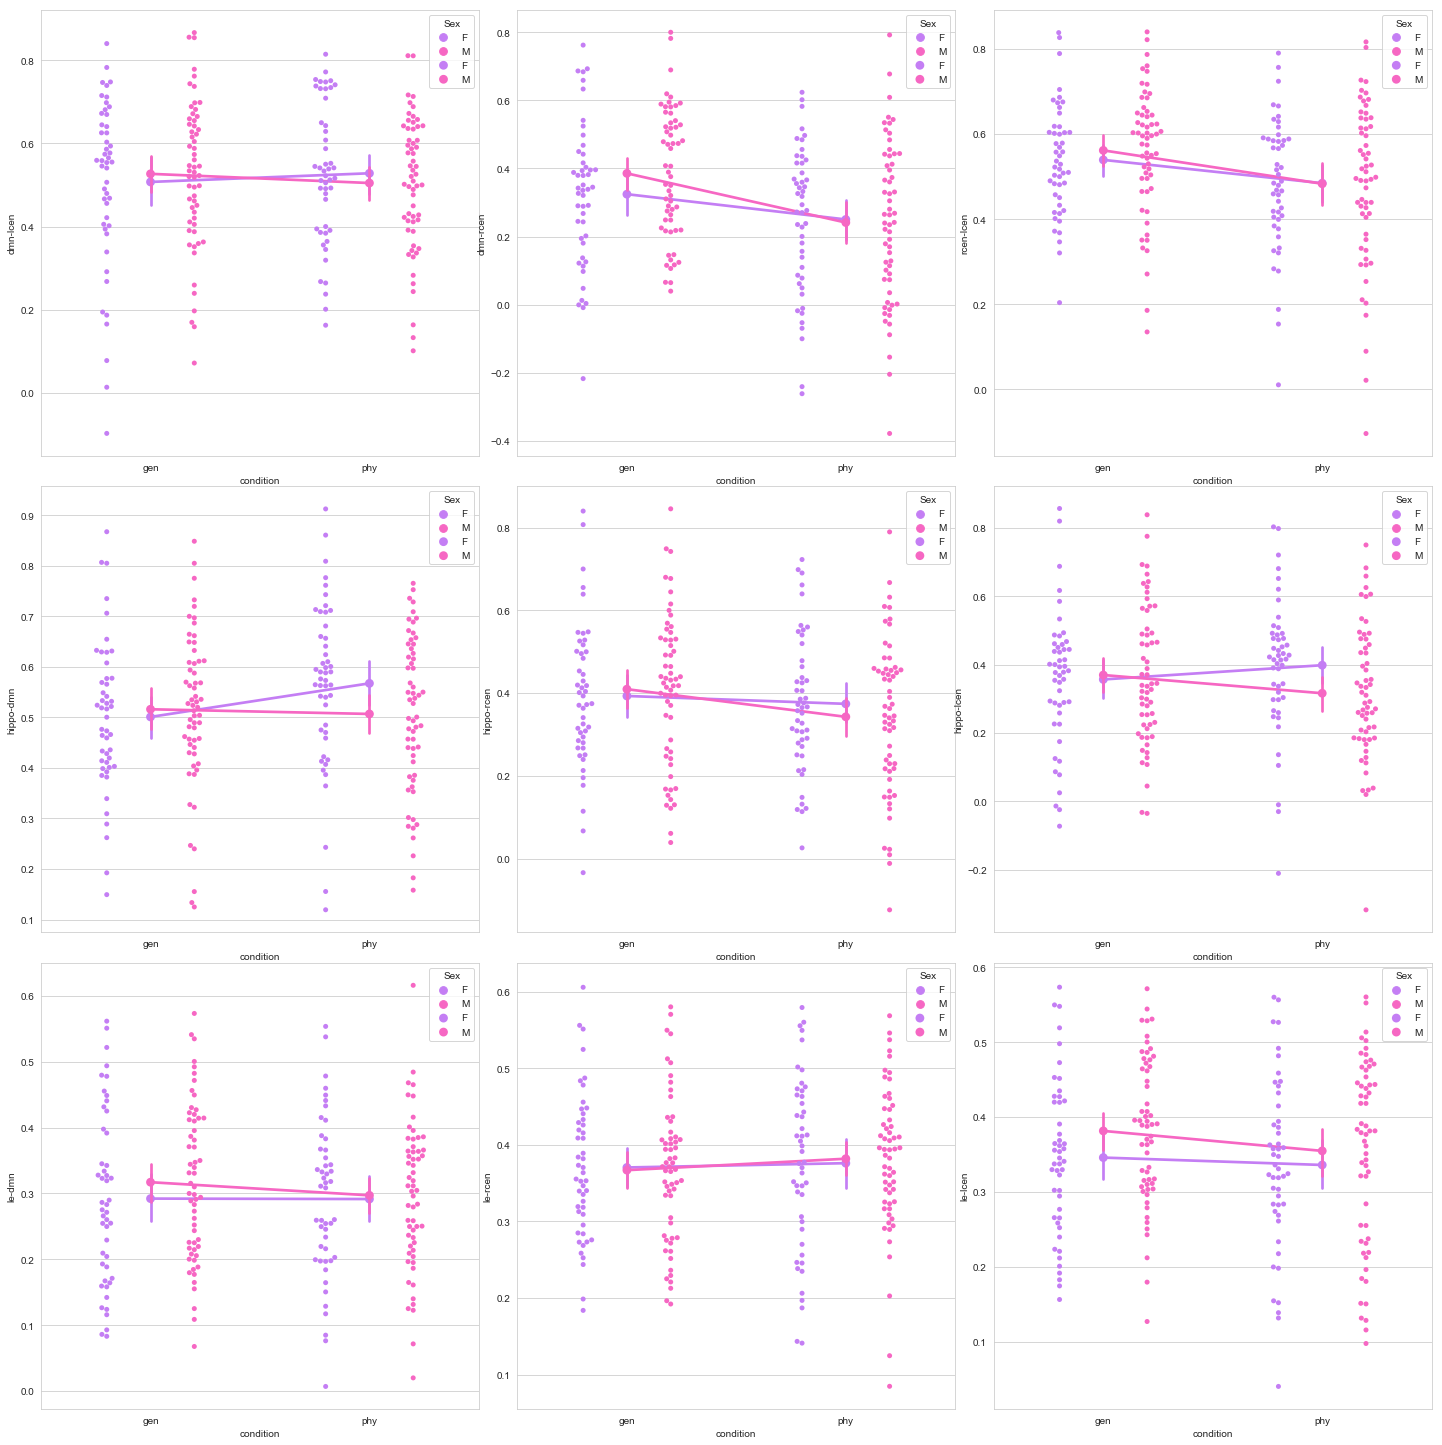

In [115]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), sharex=False, sharey=False, squeeze=True)
plt.tight_layout()
sns.set_palette(hustler)

sns.swarmplot(x="condition", y="dmn-lcen", data=brain_df, hue='Sex', ax=ax[0][0], dodge=True)
sns.swarmplot(x="condition", y="dmn-rcen", data=brain_df, hue='Sex', ax=ax[0][1], dodge=True)
sns.swarmplot(x="condition", y="rcen-lcen", data=brain_df, hue='Sex', ax=ax[0][2], dodge=True)
sns.swarmplot(x="condition", y="hippo-dmn", data=brain_df, hue='Sex', ax=ax[1][0], dodge=True)
sns.swarmplot(x="condition", y="hippo-rcen", data=brain_df, hue='Sex', ax=ax[1][1], dodge=True)
sns.swarmplot(x="condition", y="hippo-lcen", data=brain_df, hue='Sex', ax=ax[1][2], dodge=True)
sns.swarmplot(x="condition", y="le-dmn", data=brain_df, hue='Sex', ax=ax[2][0], dodge=True)
sns.swarmplot(x="condition", y="le-rcen", data=brain_df, hue='Sex', ax=ax[2][1], dodge=True)
sns.swarmplot(x="condition", y="le-lcen", data=brain_df, hue='Sex', ax=ax[2][2], dodge=True)

sns.pointplot(x="condition", y="dmn-lcen", data=brain_df, hue='Sex', ax=ax[0][0])
sns.pointplot(x="condition", y="dmn-rcen", data=brain_df, hue='Sex', ax=ax[0][1])
sns.pointplot(x="condition", y="rcen-lcen", data=brain_df, hue='Sex', ax=ax[0][2])
sns.pointplot(x="condition", y="hippo-dmn", data=brain_df, hue='Sex', ax=ax[1][0])
sns.pointplot(x="condition", y="hippo-rcen", data=brain_df, hue='Sex', ax=ax[1][1])
sns.pointplot(x="condition", y="hippo-lcen", data=brain_df, hue='Sex', ax=ax[1][2])
sns.pointplot(x="condition", y="le-dmn", data=brain_df, hue='Sex', ax=ax[2][0])
sns.pointplot(x="condition", y="le-rcen", data=brain_df, hue='Sex', ax=ax[2][1])
sns.pointplot(x="condition", y="le-lcen", data=brain_df, hue='Sex', ax=ax[2][2])

fig.savefig(join(fig_dir, '1-brain_networks_sex_swarm.png'), dpi=300)

In [97]:
from nilearn import plotting, datasets, surface
fsaverage = datasets.fetch_surf_fsaverage()

dmn = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/comp13-bin.nii.gz'
lcen = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/comp18-bin.nii.gz'
rcen = '/Users/Katie/Dropbox/Katie and Angie/2011 BrainMap ICA Maps/comp15-bin.nii.gz'
hippo = '/Users/Katie/Dropbox/Projects/physics-retrieval/harvox-hippo-prob50-2mm.nii.gz'

In [121]:
color1 = sns.light_palette("#00CC99", as_cmap=True)
color2 = sns.light_palette("#00CCCC", as_cmap=True)
color3 = sns.light_palette("#02A4D3", as_cmap=True)
color4 = sns.light_palette("#4F69C6", as_cmap=True)

In [158]:
color2 = sns.light_palette((0.19783576093349015, 0.6955516966063037, 0.3995301037444499), as_cmap=True)
color3 = sns.light_palette((0.21044753832183283, 0.6773105080456748, 0.6433941168468681), as_cmap=True)
color4 = sns.light_palette((0.22335772267769388, 0.6565792317435265, 0.8171355503265633), as_cmap=True)
color1 = sns.light_palette([0.5920891529639701, 0.6418467016378244, 0.1935069134991043], as_cmap=True)

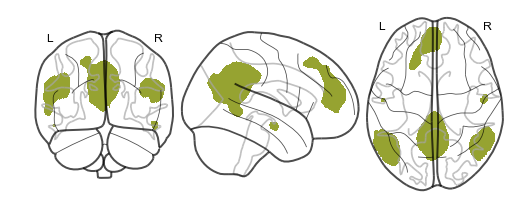

In [159]:
dmn_brain = plotting.plot_glass_brain(dmn, threshold=0.9, cmap=color1)
dmn_brain.savefig(join(fig_dir, '1-dmn.png'), dpi=300)

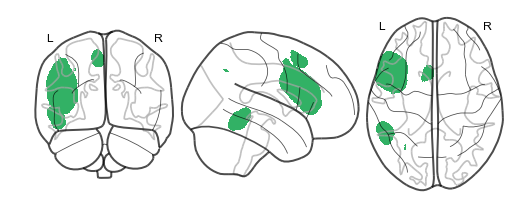

In [160]:
lcen_brain = plotting.plot_glass_brain(lcen, threshold=0.9, cmap=color2)
lcen_brain.savefig(join(fig_dir, '1-lcen.png'), dpi=300)

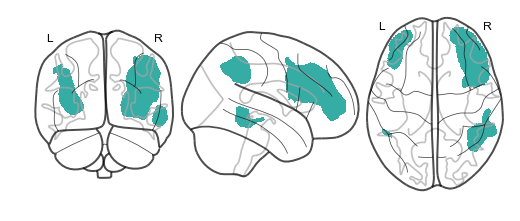

In [161]:
rcen_brain = plotting.plot_glass_brain(rcen, threshold=0.9, cmap=color3)
rcen_brain.savefig(join(fig_dir, '1-rcen.png'), dpi=300)

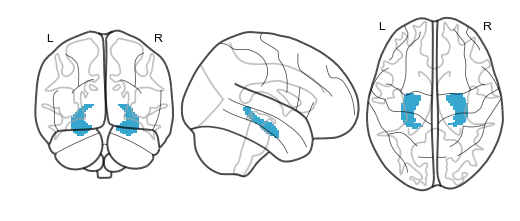

In [162]:
hippo_brain = plotting.plot_glass_brain(hippo, threshold=0.9, cmap=color4)
hippo_brain.savefig(join(fig_dir, '1-hippo.png'), dpi=300)

# NBS Results for comparing whole-brain graphs

In [7]:
gen_white = sns.blend_palette([[1,1,1],[0.9438207464710098, 0.6601469711240978, 0.23410964234229298]], n_colors=2)
gen_gt_phy_cmap = [hustle[0],hustle[1]]

In [10]:
gen_gt_phy = pd.read_csv(join(data_dir, 'gen-gt-phy_gen_comp_adj_[0.025].csv'), header=0, index_col=0)

In [11]:
corrfonty = {'fontsize': 20,
             'fontweight': 'regular',
             'verticalalignment': 'center',
             'horizontalalignment': 'right'}
corrfontx = {'fontsize': 20,
             'fontweight': 'regular',
             'verticalalignment': 'top',
             'horizontalalignment': 'center'}
corrfigsize = (20,20)

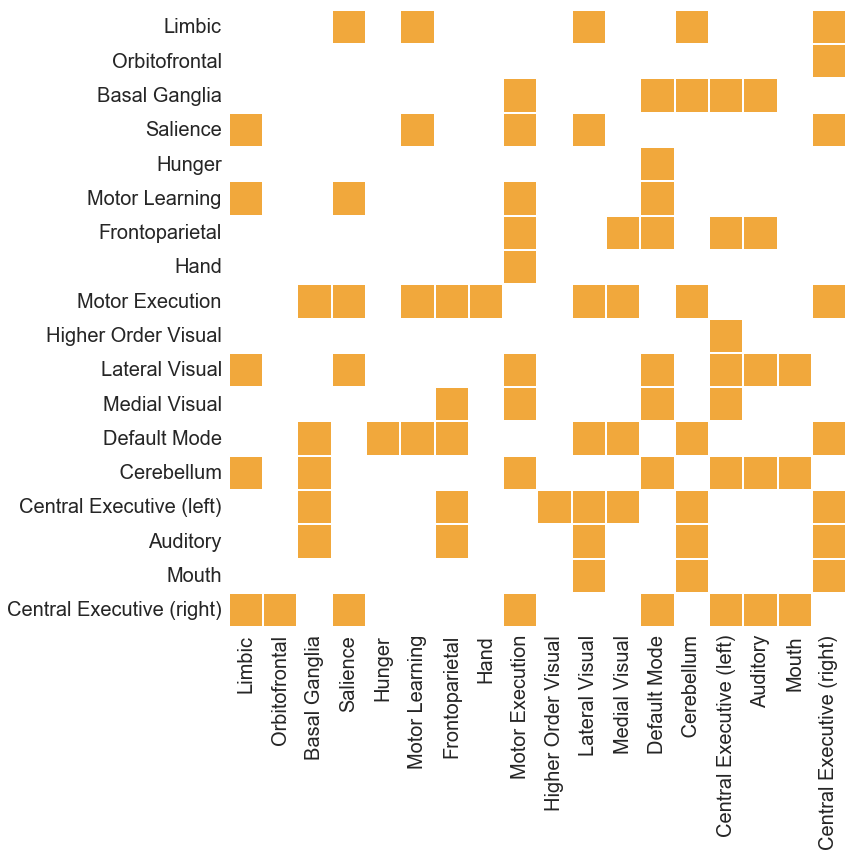

In [14]:
fig,ax = plt.subplots(figsize=(12,12), squeeze=False)
ax =sns.heatmap(gen_gt_phy, vmin=0, vmax=1, cmap=gen_white, linewidths=1,
                 cbar=False)
ax.set_yticklabels(labels, fontdict=corrfonty,clip_on=False)
ax.set_xticklabels(labels, fontdict=corrfontx, clip_on=True)
plt.tight_layout()

fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/gen-gt-phy_all_students.png', dpi=300)

In [15]:
#and now for separated into sexes
m_gen_gt_phy = pd.read_csv(join(data_dir, 'm_gen-gt-phy_comp_adj_[0.045].csv'), header=0, index_col=0)

In [94]:
hsluv.hsluv_to_rgb([10.25, 89.10737751991643, 74.25289201147227])

[0.9748518220059893, 0.6195931728191427, 0.6321278926740924]

In [124]:
m_white = sns.blend_palette([[1,1,1], [0.9632313909518838, 0.40561159727794466, 0.7633379508418209]],
                                     n_colors=2)

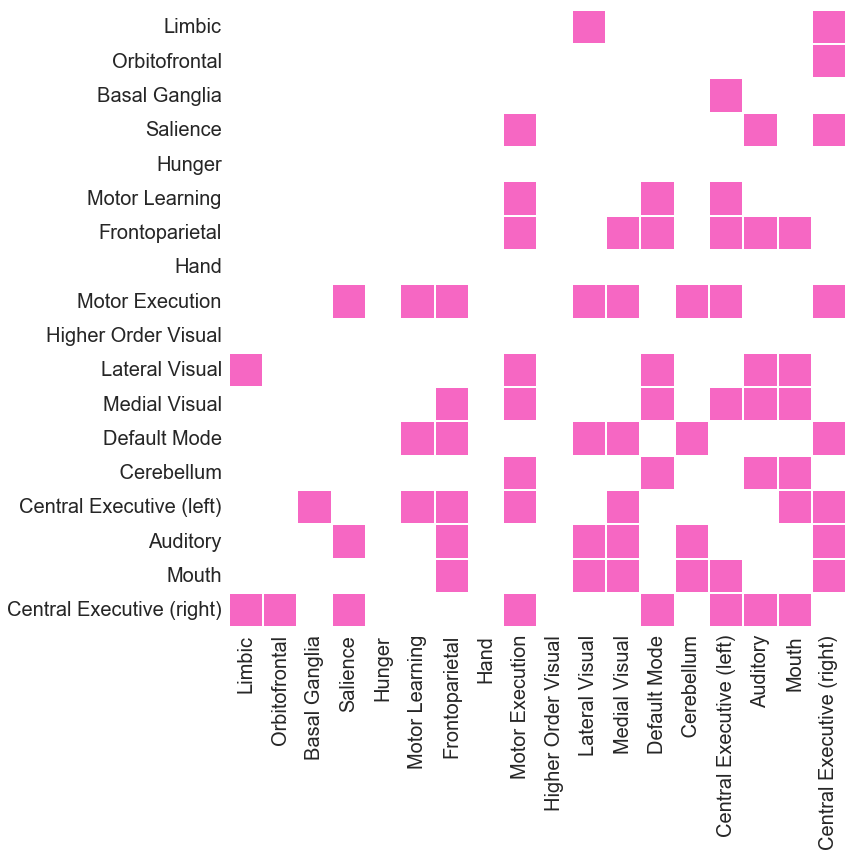

In [122]:
fig,ax = plt.subplots(figsize=(12,12), squeeze=False)
ax =sns.heatmap(m_gen_gt_phy, vmin=0, vmax=1, cmap=m_white, linewidths=1,
                 cbar=False)
ax.set_yticklabels(labels, fontdict=corrfonty,clip_on=False)
ax.set_xticklabels(labels, fontdict=corrfontx, clip_on=True)

plt.tight_layout()

fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/gen-gt-phy_male_students.png', dpi=300)

In [90]:
diverge = sns.diverging_palette(332.0811242717872, 48.481001784815675, 89.0997055069239, 64.35352949542131, n=5)

In [ ]:
white_m_all_plus = sns.blend_palette([[1,1,1],
                             [0.9632313909518838, 0.40561159727794466, 0.7633379508418209],
                             [0.9438207464710098, 0.6601469711240978, 0.23410964234229298],
                             [0.9748518220059893, 0.6195931728191427, 0.6321278926740924]], 
                            n_colors=4)

In [91]:
match = gen_gt_phy*2 + (m_gen_gt_phy)
all_men_discrepancies =  + match.values

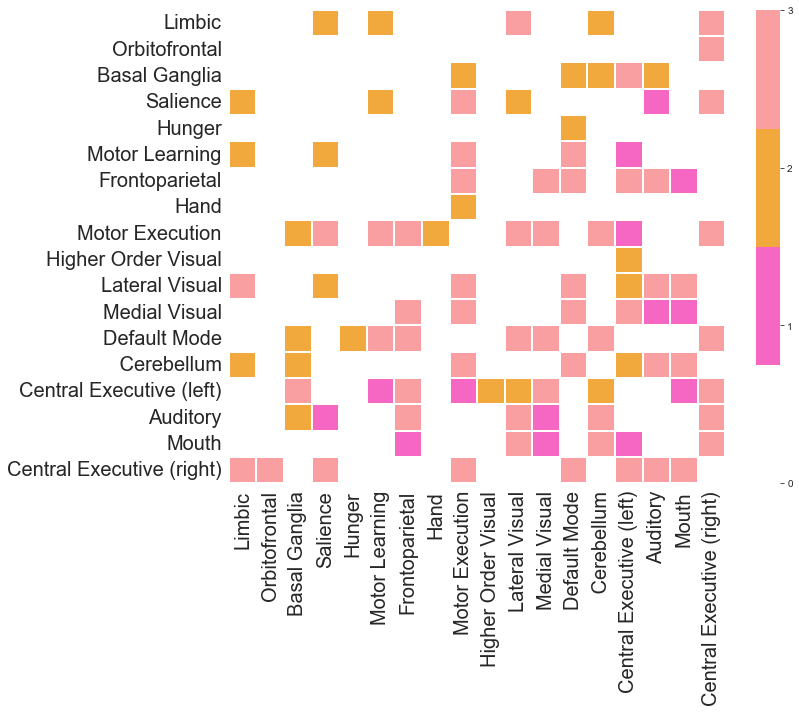

In [116]:
#comparing the gen>phy results in men and in the whole sample
#is there any way I can make this a venn diagram??
fig,ax = plt.subplots(figsize=(12,10), squeeze=False)
ax =sns.heatmap(match, vmin=0, vmax=3, linewidths=1, cmap=white_m_all_plus, 
                cbar_kws={'ticks':[0,1,2,3]})
ax.set_yticklabels(labels, fontdict=corrfonty,clip_on=False)
ax.set_xticklabels(labels, fontdict=corrfontx, clip_on=True)
plt.tight_layout()
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/gen-gt-phy_male_all_students_comparison.png', dpi=300)

In [117]:
m_gt_f_gen = pd.read_csv(join(data_dir, 'm-gt-f_gen_comp_adj_[0.023].csv'), header=0, index_col=0)

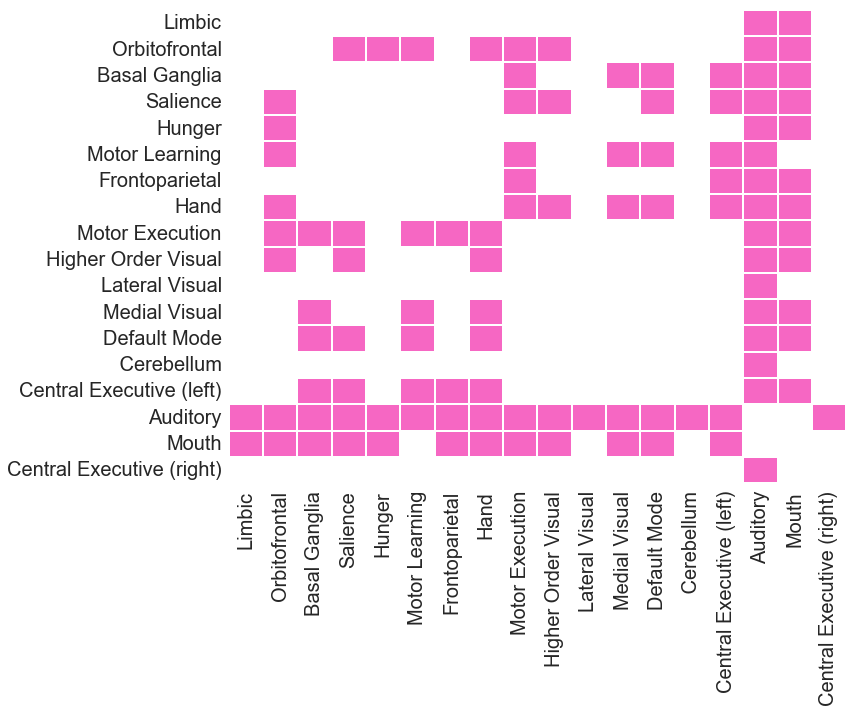

In [125]:
#comparing the m>pf results for gen
fig,ax = plt.subplots(figsize=(12,10), squeeze=False)
ax =sns.heatmap(m_gt_f_gen, vmin=0, vmax=1, linewidths=1, cmap=m_white, 
                cbar=False)
ax.set_yticklabels(labels, fontdict=corrfonty,clip_on=False)
ax.set_xticklabels(labels, fontdict=corrfontx, clip_on=True)
plt.tight_layout()
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/m-gt-f_gen.png', dpi=300)